In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import os, shutil

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [ ]:
rawdata=pd.read_csv('/content/drive/MyDrive/dacon/타이타닉/data/train.csv')
rawdata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Column 분석

- PassengerID : 탑승객 고유 아이디
- Survival : 탑승객 생존 유무 (0: 사망, 1: 생존)
- Pclass : 등실의 등급
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탑승한 형제자매, 아내, 남편의 수
- Parch : 함께 탑승한 부모, 자식의 수
- Ticket :티켓 번호
- Fare : 티켓의 요금
- Cabin : 객실번호
- Embarked : 배에 탑승한 항구 이름 ( C = Cherbourn, Q = Queenstown, S = Southampton)

- categorical variable
  - Pclass, Sex, Sibsp, Parch, Cabin, Embarked
- continuous variable
  - Age, Fare
- target : Survival

In [ ]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
rawdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
rawdata.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
rawdata.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
rawdata.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
len(rawdata.Ticket.value_counts())

681

In [ ]:
max(rawdata.Age)

80.0

# 분포도

## Survived

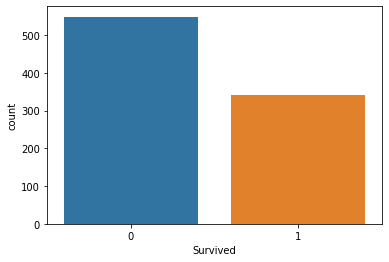

In [ ]:
sns.countplot(data=rawdata, x='Survived')

사망자가 더 많다.

## Age

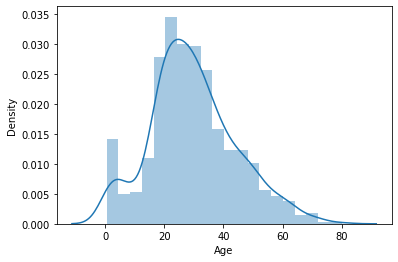

In [ ]:
sns.distplot(rawdata.Age)

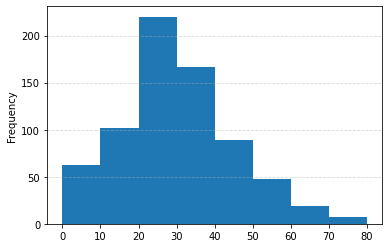

In [ ]:
rawdata['Age'].plot.hist(bins=range(0,81,10))
plt.grid(True, axis='y', alpha=0.5, linestyle='--')
plt.show()

2-30대의 승객이 많다.

- 사망/생존자별 나이 분포

Text(0.5, 1.0, 'survival')

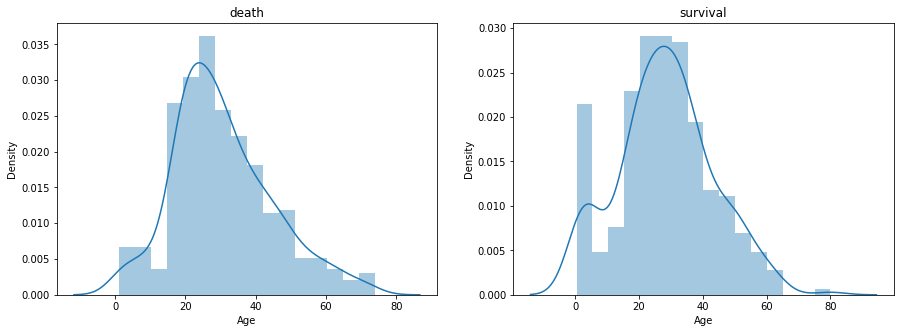

In [ ]:
survive0=rawdata[rawdata['Survived']==0]
survive1=rawdata[rawdata['Survived']==1]

f,axes=plt.subplots(1,2, figsize=(15, 5))
sns.distplot(survive0.Age, ax=axes[0])
axes[0].set_title('death')
sns.distplot(survive1.Age, ax=axes[1])
axes[1].set_title('survival')

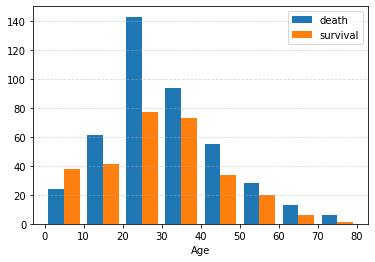

In [ ]:
plt.hist([survive0.Age, survive1.Age], bins=range(0,81,10), label=['death','survival'])
plt.legend()
plt.grid(True, axis='y', alpha=0.5, linestyle='--')
plt.xlabel('Age')
plt.show()

아이들만 생존비율이 더 높다

## Sex

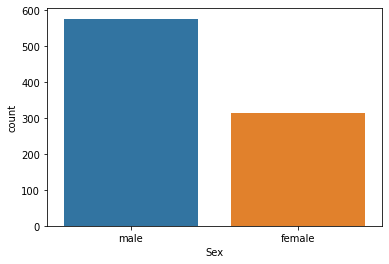

In [ ]:
sns.countplot(rawdata.Sex)

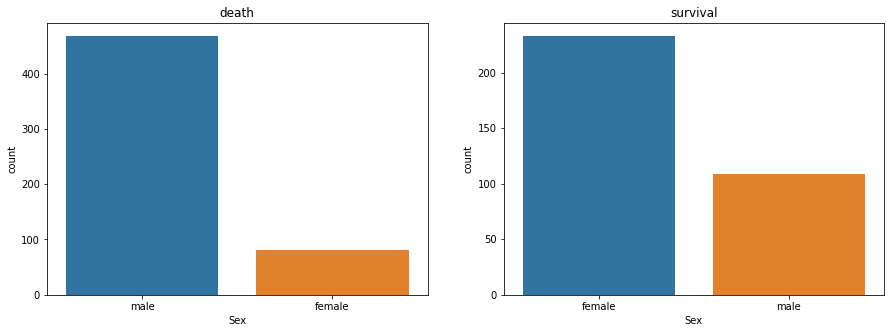

In [ ]:
f,axes=plt.subplots(1,2, figsize=(15, 5))
sns.countplot(survive0.Sex, ax=axes[0])
axes[0].set_title('death')
sns.countplot(survive1.Sex, ax=axes[1])
axes[1].set_title('survival')
plt.show()

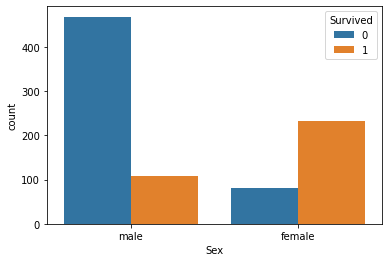

In [ ]:
ax=plt.subplots()
ax=sns.countplot(x='Sex', hue='Survived', data=rawdata)

남자는 대부분이 사망, 여자는 더 많은 인원이 생존

##Pclass

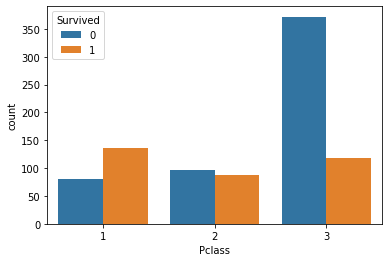

In [ ]:
ax=plt.subplots()
ax=sns.countplot(x='Pclass', hue='Survived', data=rawdata)

- 3등급 객실의 경우 사망률이 생존율보다 훨씬 높다.
- 1등급의 객실만 유일하게 생존율이 더 높음.

## SibSp/Parch

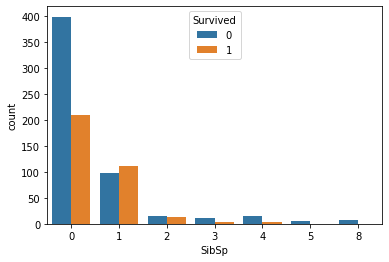

In [ ]:
sns.countplot(x='SibSp', hue='Survived', data=rawdata)

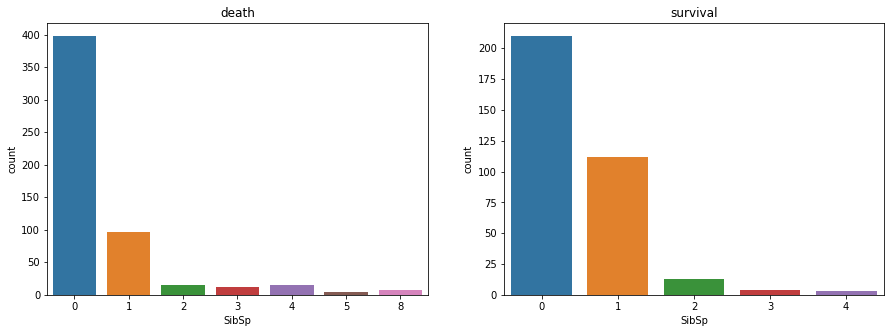

In [ ]:
f,axes=plt.subplots(1,2, figsize=(15, 5))
sns.countplot(survive0.SibSp, ax=axes[0])
axes[0].set_title('death')
sns.countplot(survive1.SibSp, ax=axes[1])
axes[1].set_title('survival')
plt.show()

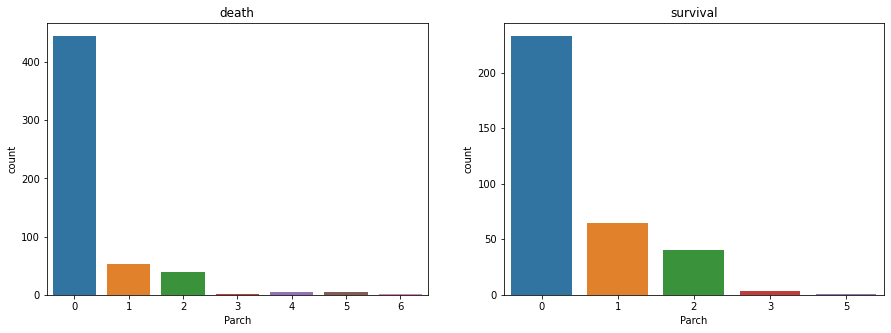

In [ ]:
f,axes=plt.subplots(1,2, figsize=(15, 5))
sns.countplot(survive0.Parch, ax=axes[0])
axes[0].set_title('death')
sns.countplot(survive1.Parch, ax=axes[1])
axes[1].set_title('survival')
plt.show()

- 혼자 온 승객의 생존율은?

In [ ]:
condition=(rawdata.Age.isnull()) & (rawdata.SibSp==0) & (rawdata.Parch==0)
df=rawdata.loc[condition]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S


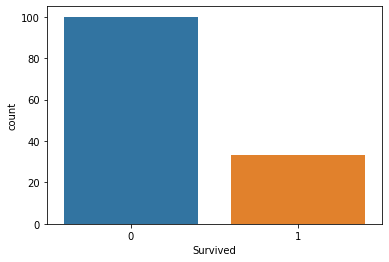

In [ ]:
sns.countplot(data=df, x='Survived')

## Fare

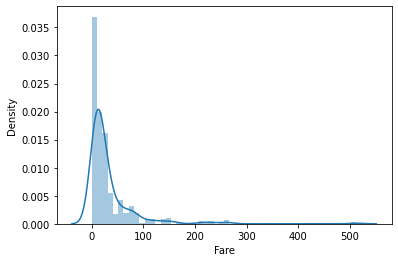

In [ ]:
sns.distplot(rawdata.Fare)

In [ ]:
print(len(rawdata.Fare.value_counts()))
print(max(rawdata.Fare))
print(min(rawdata.Fare))

248
512.3292
0.0


Text(0.5, 1.0, 'survival')

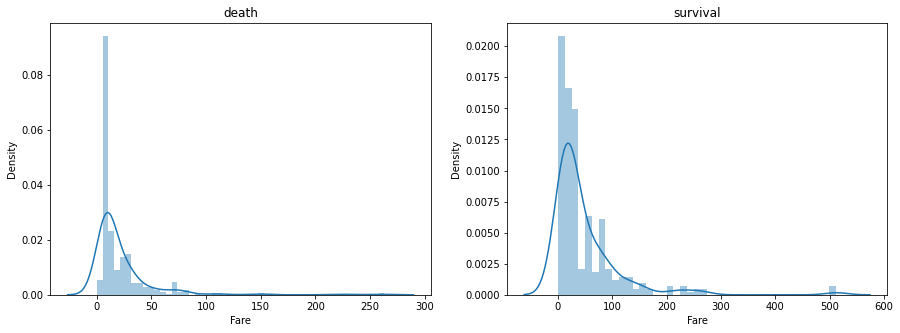

In [ ]:
f,axes=plt.subplots(1,2, figsize=(15, 5))
sns.distplot(survive0.Fare, ax=axes[0])
axes[0].set_title('death')
sns.distplot(survive1.Fare, ax=axes[1])
axes[1].set_title('survival')

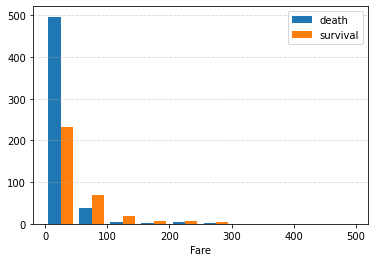

In [ ]:
plt.hist([survive0.Fare, survive1.Fare], bins=range(0,550,50), label=['death','survival'])
plt.legend()
plt.grid(True, axis='y', alpha=0.5, linestyle='--')
plt.xlabel('Fare')
plt.show()

저렴하게 구매한 사람들이 사망률이 높다..

## Embarked

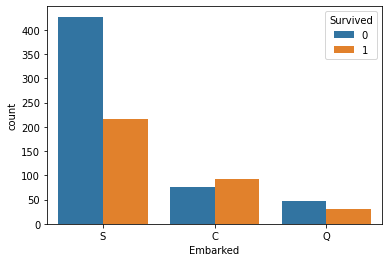

In [ ]:
sns.countplot(x='Embarked', hue='Survived', data=rawdata)

In [ ]:
plt.hist([survive0.Fare, survive1.Fare], bins=range(0,550,50), label=['death','survival'])
plt.legend()
plt.grid(True, axis='y', alpha=0.5, linestyle='--')
plt.xlabel('Fare')
plt.show()

## 자료간 상관관계

In [ ]:
def makeCorr(x, width=15, height=7):
  plt.figure( figsize=(width, height) )
  mask = np.zeros_like(x.corr(), dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  sns.heatmap(x.corr(), annot=True, fmt='.2f', mask=mask, cmap='YlOrBr')
  plt.show()

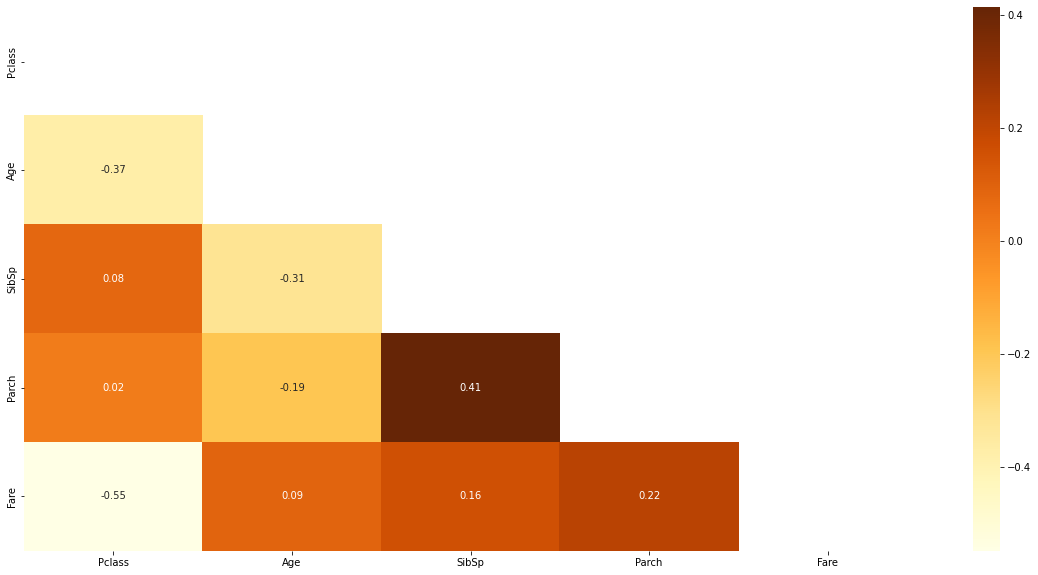

In [ ]:
makeCorr( rawdata.drop(columns=['PassengerId','Survived']), width=20, height=10 )

# 결측치
- Age
- Cabin 
- Embarked

## Cabin
- 결측치가 더 많다. 
- 컬럼 삭제해도 무방할 듯.

In [ ]:
rawdata=rawdata.drop(['Cabin'], axis=1)
rawdata.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


## Embarked
- 자료 2개뿐, 삭제

In [ ]:
rawdata.loc[rawdata.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [ ]:
rawdata=rawdata.dropna(subset = ['Embarked'])
len(rawdata)

889

## Age 결측치 처리

In [ ]:
rawdata.loc[rawdata.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [ ]:
condition=(rawdata.Age.isnull()) & (rawdata.SibSp==0) & (rawdata.Parch==0)
rawdata.loc[condition]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S


In [ ]:
rawdata.loc[condition].Survived.value_counts()

0    100
1     33
Name: Survived, dtype: int64

- 가족동반없이 탑승한 사람 133명
- 그 중 100명은 사망, 33명만 생존
- 나이추정이 어렵다..

In [ ]:
condition2=(rawdata.Age.isnull()) & ((rawdata.SibSp!=0) & (rawdata.Parch!=0))
rawdata.loc[condition2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,C
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,C
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,S
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,S
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,S
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,S
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,S


- 아내/남편, 부모/자녀와 다같이 온 승객 16명
- 20대 이상?..

### Mr, Mrs, Miss, Master 로 나이 구분?




### master

In [ ]:
#Name 항목에 Master가 포함된 행 추출
df_master=rawdata[rawdata['Name'].str.contains('Master')]
df_master

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,C
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,S


4.574166666666667


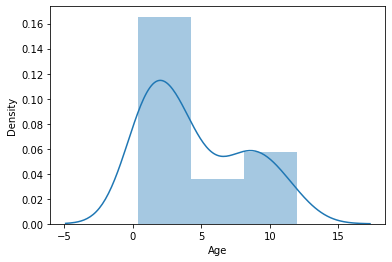

In [ ]:
#결측치 제외한 평균 나이
print(df_master.Age.mean())
sns.distplot(df_master.Age)

In [ ]:
df_master[df_master.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,C
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,S
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,S
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,C


In [ ]:
#결측치 임의로 5입력
rawdata.Age[65]=5
rawdata.Age[159]=5
rawdata.Age[176]=5
rawdata.Age[709]=5

In [ ]:
rawdata.Age.isna().sum()

173

### Mr

In [ ]:
df_mr=rawdata[rawdata['Name'].str.contains('Mr.')]
df_mr=df_mr[df_mr['Sex']=='male']
df_mr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


32.409774436090224
30.0


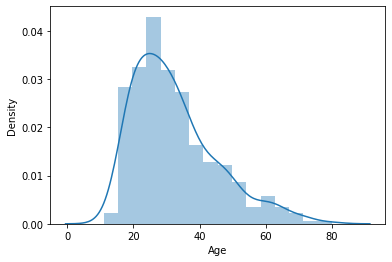

In [ ]:
sns.distplot(df_mr.Age)
print(df_mr.Age.mean())
print(df_mr.Age.median())

In [ ]:
print(df_mr[df_mr['Survived']==0].Age.mean())
print(df_mr[df_mr['Survived']==1].Age.mean())

32.23111782477341
33.279411764705884


32.38831615120275
29.0


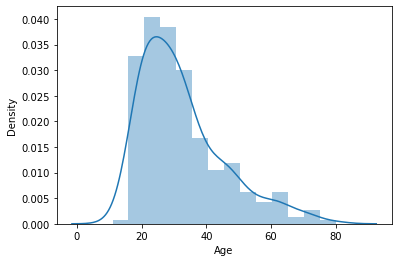

In [ ]:
condition=(df_mr['SibSp']==0) & (df_mr['Parch']==0)
print(df_mr[condition].Age.mean())
print(df_mr[condition].Age.median())
sns.distplot(df_mr[condition].Age)

In [ ]:
df_mr[df_mr.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,C
...,...,...,...,...,...,...,...,...,...,...,...
837,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C
844,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,S
857,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
866,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S


In [ ]:
mr_age=df_mr[df_mr.Age.isnull()].PassengerId.values
mr_age

array([  6,  18,  27,  30,  37,  43,  46,  47,  49,  56,  65,  77,  78,
        88,  96, 102, 108, 122, 127, 155, 159, 169, 182, 186, 197, 202,
       215, 224, 251, 261, 271, 278, 285, 296, 299, 302, 305, 325, 336,
       352, 355, 365, 385, 389, 411, 412, 414, 421, 426, 429, 445, 452,
       455, 460, 465, 467, 469, 471, 476, 482, 491, 496, 498, 508, 512,
       518, 523, 525, 528, 532, 539, 548, 553, 558, 561, 564, 569, 585,
       590, 599, 602, 603, 612, 614, 630, 634, 640, 644, 649, 651, 657,
       668, 675, 693, 712, 719, 733, 739, 740, 741, 761, 769, 774, 777,
       779, 784, 791, 794, 816, 826, 827, 829, 833, 838, 840, 847, 860,
       869, 879])

In [ ]:
#임의로 32살 입력
for age in mr_age:
  rawdata.Age[int(age)-1]=32

In [ ]:
rawdata.Age.isna().sum()

54

### Mrs

In [ ]:
df_mrs=rawdata[rawdata['Name'].str.contains('Mrs.')]

In [ ]:
df_mrs[df_mrs.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,C
139,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,C
165,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,S
255,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,C
333,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,S
346,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,S
366,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,C
374,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,C
414,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,S


35.05357142857143
33.0


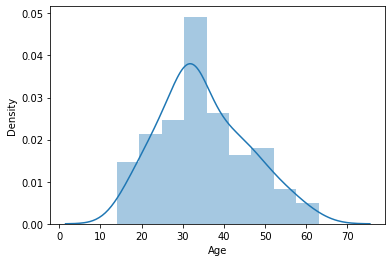

In [ ]:
sns.distplot(df_mrs.Age)
print(df_mrs.Age.mean())
print(df_mrs.Age.median())

37.44444444444444
35.0


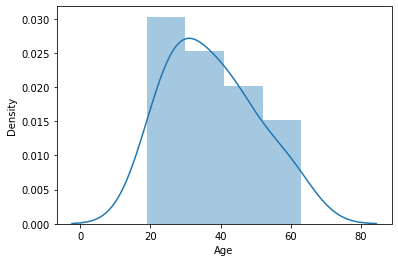

In [ ]:
condition=(df_mrs['SibSp']==0) & (df_mrs['Parch']==0)
print(df_mrs[condition].Age.mean())
print(df_mrs[condition].Age.median())
sns.distplot(df_mrs[condition].Age)

In [ ]:
print(df_mrs[df_mrs['Survived']==0].Age.mean())
print(df_mrs[df_mrs['Survived']==1].Age.mean())

36.0
34.79545454545455


In [ ]:
#임의로 35 입력
mrs_age=df_mrs[df_mrs.Age.isnull()].PassengerId.values
for age in mrs_age:
  rawdata.Age[int(age)-1]=35

In [ ]:
rawdata.Age.isna().sum()

37

### Miss

In [ ]:
df_miss=rawdata[rawdata['Name'].str.contains('Miss')]
df_miss

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,Q
...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


In [ ]:
df_miss.Age.isna().sum()

6

21.662068965517243


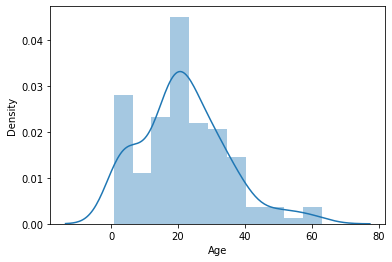

In [ ]:
sns.distplot(df_miss.Age)
print(df_miss.Age.mean())

In [ ]:
df_miss.Parch.value_counts()

0    117
2     36
1     28
Name: Parch, dtype: int64

In [ ]:
print(df_miss[df_miss['Parch']==0].Age.mean())
print(df_miss[df_miss['Parch']==1].Age.mean())
print(df_miss[df_miss['Parch']==2].Age.mean())

27.65
9.895833333333334
13.387096774193548


In [ ]:
df_miss.SibSp.value_counts()

0    122
1     30
2     10
3      9
4      6
8      3
5      1
Name: SibSp, dtype: int64

In [ ]:
print(df_miss[df_miss['SibSp']==0].Age.mean())
print(df_miss[df_miss['SibSp']==1].Age.mean())
print(df_miss[df_miss['SibSp']>=2].Age.mean())

24.565656565656564
19.854166666666668
10.568181818181818


In [ ]:
#가족과 함께 오지 않은(혼자 혹은 친구와 온?) Miss의 평균 나이
condition = (df_miss.SibSp==0) & (df_miss.Parch==0)
df_miss[condition].Age.mean()

27.61038961038961

In [ ]:
df_miss[condition][df_miss.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,Q
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,Q
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,Q
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,Q
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,S
264,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,Q
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,Q
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,Q
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,Q


In [ ]:
miss_age=df_miss[condition][df_miss.Age.isnull()].PassengerId.values
miss_age

array([ 29,  33,  48,  83, 199, 236, 265, 275, 301, 304, 307, 359, 360,
       369, 503, 565, 574, 597, 654, 681, 698, 728])

In [ ]:
#가족과 함께 오지 않은(혼자 혹은 친구와 온?) Miss 의 나이가 결측치인 22개의 자료를 평균나이 28로 임의로 입력
for age in miss_age:
  rawdata.Age[int(age)-1]=28

In [ ]:
df_miss=rawdata[rawdata['Name'].str.contains('Miss')]
df_miss[df_miss.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,Q
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,C
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,S
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,Q
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.2500,Q
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,S
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,S
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,Q


In [ ]:
#Lefebre 성을 가진 miss 세명, master 1명. 정보일치, 가족,어린아이 추정. 임의로 10 입력
rawdata.Age[229]=10
rawdata.Age[409]=10
rawdata.Age[485]=10

In [ ]:
#부모/자녀X 형제자매와 온 miss -> 성인
condition = (df_miss.SibSp>=1) & (df_miss.Parch==0)
df_miss[condition].Age.mean()

27.884615384615383

In [ ]:
rawdata.Age[109]=28
rawdata.Age[240]=28
rawdata.Age[241]=28
rawdata.Age[330]=28
rawdata.Age[612]=28

In [ ]:
df_miss=rawdata[rawdata['Name'].str.contains('Miss')]
df_miss[df_miss.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,C
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,S
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,Q
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S


In [ ]:
rawdata.Age[180]=11
rawdata.Age[593]=11
rawdata.Age[792]=11
rawdata.Age[863]=11
rawdata.Age[888]=11
rawdata.Age[128]=10

In [ ]:
rawdata.Age.isnull().sum()

1

In [ ]:
rawdata[rawdata.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,C


In [ ]:
rawdata.Age[766]=32
rawdata.Age.isna().sum()

0

In [ ]:
rawdata.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
rawdata.to_csv('/content/drive/MyDrive/dacon/타이타닉/data/rawdata.csv', index=False)

In [ ]:
rawdata.to_csv('/content/drive/MyDrive/dacon/타이타닉/data/rawData.csv', index=False)
#train, 결측치 끝

# 테스트자료 결측치 처리

In [ ]:
test=pd.read_csv('/content/drive/MyDrive/dacon/타이타닉/data/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Master

In [ ]:
test[test['Name'].str.contains('Master')]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,913,3,"Olsen, Master. Artur Karl",male,9.00,0,1,C 17368,3.1708,NaN,S
55,947,3,"Rice, Master. Albert",male,10.00,4,1,382652,29.1250,NaN,Q
64,956,1,"Ryerson, Master. John Borie",male,13.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
80,972,3,"Boulos, Master. Akar",male,6.00,1,1,2678,15.2458,NaN,C
89,981,2,"Wells, Master. Ralph Lester",male,2.00,1,1,29103,23.0000,NaN,S
154,1046,3,"Asplund, Master. Filip Oscar",male,13.00,4,2,347077,31.3875,NaN,S
161,1053,3,"Touma, Master. Georges Youssef",male,7.00,1,1,2650,15.2458,NaN,C
192,1084,3,"van Billiard, Master. Walter John",male,11.50,1,1,A/5. 851,14.5000,NaN,S
194,1086,2,"Drew, Master. Marshall Brines",male,8.00,0,2,28220,32.5000,NaN,S
196,1088,1,"Spedden, Master. Robert Douglas",male,6.00,0,2,16966,134.5000,E34,C


In [ ]:
test.Age[244]=5
test.Age[339]=5
test.Age[344]=5
test.Age[417]=5

## Miss

In [ ]:
test_miss=test[test['Name'].str.contains('Miss')]
test_miss

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
18,910,3,"Ilmakangas, Miss. Ida Livija",female,27.0,1,0,STON/O2. 3101270,7.9250,NaN,S
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
37,929,3,"Cacic, Miss. Manda",female,21.0,0,0,315087,8.6625,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
402,1294,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.4000,NaN,C
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q


In [ ]:
condition = (test_miss.SibSp==0) & (test_miss.Parch==0)
miss_age=test_miss[condition][test_miss.Age.isnull()].PassengerId.values
miss_age

array([ 928, 1003, 1052, 1092, 1108, 1119, 1160, 1174, 1196, 1300, 1302])

In [ ]:
for age in miss_age:
  test.Age[int(age)-892]=28
test.Age.isna().sum()

71

In [ ]:
test_miss=test[test['Name'].str.contains('Miss')]
Age=test_miss[test_miss.Age.isnull()].PassengerId.values
Age

array([1019, 1080, 1165])

In [ ]:
for age in Age:
  test.Age[int(age)-892]=11

## Mrs

In [ ]:
test_Mrs=test[test['Name'].str.contains('Mrs.')]
test_Mrs

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
...,...,...,...,...,...,...,...,...,...,...,...
383,1275,3,"McNamee, Mrs. Neal (Eileen O'Leary)",female,19.0,1,0,376566,16.1000,NaN,S
391,1283,1,"Lines, Mrs. Ernest H (Elizabeth Lindsey James)",female,51.0,0,1,PC 17592,39.4000,D28,S
395,1287,1,"Smith, Mrs. Lucien Philip (Mary Eloise Hughes)",female,18.0,1,0,13695,60.0000,C31,S
397,1289,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",female,48.0,1,1,13567,79.2000,B41,C


In [ ]:
mrs_age=test_Mrs[test_Mrs.Age.isnull()].PassengerId.values
for age in mrs_age:
  test.Age[int(age)-892]=35

In [ ]:
test.Age.isna().sum()

58

## Mr

In [ ]:
test_mr=test[test['Name'].str.contains('Mr.')]
test_mr=test_mr[test_mr['Sex']=='male']
test_mr

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
406,1298,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5000,NaN,S
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [ ]:
mr_age=test_mr[test_mr.Age.isnull()].PassengerId.values
mr_age

array([ 902,  921,  931,  933,  939,  946,  950,  968,  975,  976,  977,
        983,  985,  994,  999, 1000, 1008, 1013, 1016, 1025, 1038, 1040,
       1043, 1055, 1062, 1065, 1075, 1083, 1097, 1103, 1111, 1125, 1135,
       1147, 1148, 1157, 1158, 1159, 1163, 1166, 1178, 1180, 1181, 1182,
       1184, 1189, 1193, 1204, 1224, 1234, 1249, 1250, 1258, 1272, 1276,
       1305, 1308])

In [ ]:
for age in mr_age:
  test.Age[int(age)-892]=32

In [ ]:
test[test.Age.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q


In [ ]:
test.Age[88]=35

In [ ]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Fare

In [ ]:
test.loc[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [ ]:
test=test.dropna(subset = ['Fare'])

## Cabin

In [ ]:
test=test.drop(['Cabin'], axis=1)
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
test.to_csv('/content/drive/MyDrive/dacon/타이타닉/data/testprepro.csv', index=False)